# Dados

In [5]:
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.animation as animation
import numpy as np
import math

In [2]:
boston=pd.read_csv('dados/boston.csv',header=None)
boston=boston.rename(columns={boston.columns[0]:'x',boston.columns[1]:'z',boston.columns[2]:'w',boston.columns[3]:'h',boston.columns[4]:'i',
    boston.columns[5]:'e',boston.columns[6]:'o',boston.columns[7]:'l',boston.columns[8]:'g',boston.columns[9]:'f',boston.columns[10]:'s',boston.columns[11]:'u',
    boston.columns[12]:'k',boston.columns[13]:'y'})
boston

,x,z,w,h,i,e,o,l,g,f,s,u,k,y
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [6]:
gauss=pd.read_csv('dados/gauss.csv')
gauss

,x,y
0,1.0,97.587760
1,2.0,97.763440
2,3.0,96.567050
3,4.0,92.520370
4,5.0,91.150970
...,...,...
245,246.0,8.362109
246,247.0,8.983507
247,248.0,3.362469
248,249.0,1.182678


# Modelo

In [3]:
class PolinomialRegression:
  def __init__(self):
    self.w =[]
    self.n = 0

  def fit(self, x, y,n=1,l=0.0):
    x_poli = self.polinomial_transfomation(x,n)# Transforma em polinomio
    self.fit_OLS(x_poli,y,l)# Treina o modelo
    
  def polinomial_transfomation(self,x,n):
    df_columns = x.columns
    poli_columns={}
    self.n=n
    x_poli=x.copy()
    for column in df_columns:
      for i in range(2,n+1):
        poli_columns[f"{column}_{i}"] = x[column]**i
    poli_df = pd.DataFrame(poli_columns)
    x_poli = pd.concat([x,poli_df], axis=1)
    return x_poli

  def fit_OLS(self, X, y,l):
     X = X.to_numpy()  #Converte X para um array numpy
     X_b = np.c_[np.ones((X.shape[0], 1)), X]  #Adiciona a coluna de bias
     y = y.to_numpy()  #Converte y em um array numpy
     dimensoes= X_b.shape[1]
     I=np.eye(dimensoes)
     w = np.linalg.pinv((X_b.T @ X_b)+(l * I)) @ X_b.T @ y
     self.w=w  #Salva o vetor de Ws
     self.w = self.w.ravel()

  def predict(self, X):
    y_pred=[]# Lista para salvar as predições
    df_bias = pd.DataFrame({'bias':[1]*len(X)})
    x_poli = self.polinomial_transfomation(X,self.n)
    X_bias=pd.concat([df_bias,x_poli], axis=1)
    for sample in range(len(X_bias)):
      y_pred.append((X_bias.iloc[sample]*self.w).sum())# Calcula a predição e salva na lista
    return y_pred

# Normalizador

In [2]:
class Nomalizer:
    def __init__(self):
        self.y_max=0.0
        self.y_min=0.0
        self.x_max=[]
        self.x_min=[]

    def fit(self,x,y):
        # Pega os valores minimos de 
        self.y_max=y['y'].max().tolist()
        self.y_min=y['y'].min().tolist()

        # Pega os valores maximos e minimos do X
        self.x_max=x.max().tolist()
        self.x_min=x.min().tolist()
    
    def normalize(self,x,y):
        y_norm=y.map(self.y_norm_aux)
        x_norm=x.copy()
        norm_index=0
        for column in x.columns:
            x_column=[]
            for i in range(len(x[column])):
                x_column.append((x[column][i]-self.x_min[norm_index])/(self.x_max[norm_index]-self.x_min[norm_index]))
                
            norm_index+=1
            x_norm[column]=x_column    
        
        return x_norm,y_norm
    
    def desnormalize(self,x_norm,y_norm):
        y=y_norm.map(self.y_desnorm_aux)
        x=x_norm.copy()
        norm_index=0
        for column in x_norm.columns:
            x_column=[]
            for i in range(len(x_norm[column])):
                x_column.append((x_norm[column][i]*(self.x_max[norm_index]-self.x_min[norm_index]))+self.x_min[norm_index])
                
            norm_index+=1
            x[column]=x_column    
        
        return x,y
    
    def y_norm_aux(self,y):
        return (y-self.y_min)/(self.y_max-self.y_min)
    
    def y_desnorm_aux(self,y):
        return (y*(self.y_max-self.y_min))+self.y_min


# Questão 1

In [52]:
# Separação dos dados
boston_train,boston_test = train_test_split(boston, test_size=0.2, random_state=42)
boston_train=boston_train.reset_index(drop=True)
boston_test=boston_test.reset_index(drop=True)

In [53]:
# Formaçao de x e y do train test 
train_x=boston_train[['x','z','w','h','i','e','o','l','g','f','s','u','k']]
train_y=boston_train[['y']]

test_x=boston_test[['x','z','w','h','i','e','o','l','g','f','s','u','k']]
test_y=boston_test[['y']]

In [54]:
norm=Nomalizer()

In [55]:
# Ajuste do normalizador
norm.fit(train_x,train_y)

In [56]:
# Normalização do train e test
norm_Trx,norm_Try=norm.normalize(train_x,train_y)
norm_Tex,norm_Tey=norm.normalize(test_x,test_y)

Teste dos 11 modelos sem ter o fator de regularização l=0.01

In [57]:
polinomios=11
rmse_train=[]
rmse_test=[]
for n in range(1,polinomios+1):
    print(f"Produzindo as estatisticas do polinomio {n}")

    #Definição do modelo
    poli=PolinomialRegression()# Definição do modelo
    poli.fit(norm_Trx,norm_Try,n)# Treino do modelo

    #Teste da predição e o calculo do RMSE para o treino
    ytpred_norm=poli.predict(norm_Trx)# Predição para os dados de treino
    ytpred_norm_df=pd.DataFrame(ytpred_norm)# Transformando para df para desnormalizar
    x_train,yt_pred=norm.desnormalize(norm_Trx,ytpred_norm_df)# Desnormalização da predição de treino
    yt_pred_array = yt_pred.to_numpy().flatten()# Ajuste dos dados para o calaculo  
    train_y_array = train_y.to_numpy().flatten()# Ajuste dos dados para o calculo
    smetr=sum([(train_y_array[i]-yt_pred_array[i])**2 for i in range(len(yt_pred_array))])/len(yt_pred_array)# Calculo do RMSE para os dados de treino
    rsmetr=math.sqrt(smetr)# Calculo da raiz de MSE do treino
    rmse_train.append(rsmetr)# Salvando todos dos RMSEs
    print(f'RMSE do treino do polinomio {n}: {rsmetr}')

    #Teste da predição e o calculo do RMSE para o teste
    ypred_norm=poli.predict(norm_Tex)# Predição para os dados de teste
    ypred_norm_df=pd.DataFrame(ypred_norm)# Transformando para df para desnormalizar
    x_test,y_pred=norm.desnormalize(norm_Tex,ypred_norm_df)# Desnormalização da predção de treino
    y_pred_array = y_pred.to_numpy().flatten()# Ajuste dos dados para o calaculo  
    test_y_array = test_y.to_numpy().flatten()# Ajuste dos dados para o calculo
    msete=sum([(test_y_array[i]-y_pred_array[i])**2 for i in range(len(y_pred_array))])/len(y_pred_array)# Calculo do RMSE para os dados de treino
    rmsete=math.sqrt(msete)# Calculo da raiz de MSE dos RMSEs
    rmse_test.append(rmsete)# Salvando todos dos RMSEs
    print(f'RMSE do teste do polinomio {n}: {rmsete}')
    print("///////////////////////////////////////////")


    

Produzindo as estatisticas do polinomio 1
RMSE do treino do polinomio 1: 4.6520331848801675
RMSE do teste do polinomio 1: 4.928602182665342
///////////////////////////////////////////
Produzindo as estatisticas do polinomio 2
RMSE do treino do polinomio 2: 3.8182374354065995
RMSE do teste do polinomio 2: 3.668350282707348
///////////////////////////////////////////
Produzindo as estatisticas do polinomio 3
RMSE do treino do polinomio 3: 3.645766902808675
RMSE do teste do polinomio 3: 3.6547695206360307
///////////////////////////////////////////
Produzindo as estatisticas do polinomio 4
RMSE do treino do polinomio 4: 3.4195180887773526
RMSE do teste do polinomio 4: 3.5752186835309416
///////////////////////////////////////////
Produzindo as estatisticas do polinomio 5
RMSE do treino do polinomio 5: 3.212483616650856
RMSE do teste do polinomio 5: 3.486442213018495
///////////////////////////////////////////
Produzindo as estatisticas do polinomio 6
RMSE do treino do polinomio 6: 2.98762

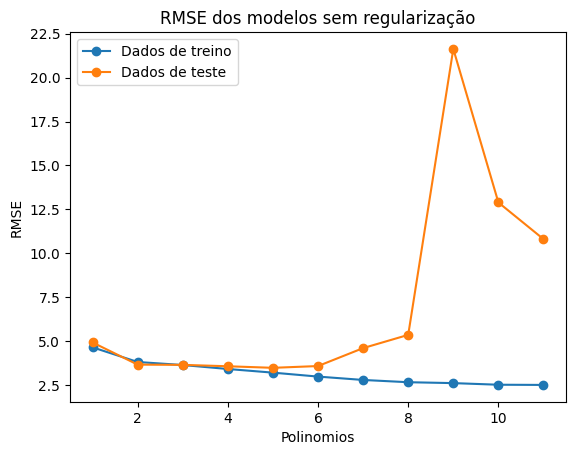

In [58]:
plt.plot(range(1,12),rmse_train,marker='o',label="Dados de treino")
plt.plot(range(1,12),rmse_test,marker='o', label="Dados de teste")
# Rótulos dos eixos e título
plt.xlabel("Polinomios")
plt.ylabel("RMSE")
plt.title("RMSE dos modelos sem regularização")
plt.legend()
plt.show()

Teste dos 11 modelos com o fator de regularização de 0.01

In [59]:
polinomios=11
rmse_train_reg=[]
rmse_test_reg=[]
l=0.01
for n in range(1,polinomios+1):
    print(f"Produzindo as estatisticas do polinomio {n}")

    #Definição do modelo
    poli=PolinomialRegression()# Definição do modelo
    poli.fit(norm_Trx,norm_Try,n,l)# Treino do modelo

    #Teste da predição e o calculo do RMSE para o treino
    ytpred_norm=poli.predict(norm_Trx)# Predição para os dados de treino
    ytpred_norm_df=pd.DataFrame(ytpred_norm)# Transformando para df para desnormalizar
    x_train,yt_pred=norm.desnormalize(norm_Trx,ytpred_norm_df)# Desnormalização da predição de treino
    yt_pred_array = yt_pred.to_numpy().flatten()# Ajuste dos dados para o calaculo  
    train_y_array = train_y.to_numpy().flatten()# Ajuste dos dados para o calculo
    smetr=sum([(train_y_array[i]-yt_pred_array[i])**2 for i in range(len(yt_pred_array))])/len(yt_pred_array)# Calculo do RMSE para os dados de treino
    rsmetr=math.sqrt(smetr)# Calculo da raiz de MSE do treino
    rmse_train_reg.append(rsmetr)# Salvando todos dos RMSEs
    print(f'RMSE do treino do polinomio {n}: {rsmetr}')

    #Teste da predição e o calculo do RMSE para o teste
    ypred_norm=poli.predict(norm_Tex)# Predição para os dados de teste
    ypred_norm_df=pd.DataFrame(ypred_norm)# Transformando para df para desnormalizar
    x_test,y_pred=norm.desnormalize(norm_Tex,ypred_norm_df)# Desnormalização da predção de treino
    y_pred_array = y_pred.to_numpy().flatten()# Ajuste dos dados para o calaculo  
    test_y_array = test_y.to_numpy().flatten()# Ajuste dos dados para o calculo
    msete=sum([(test_y_array[i]-y_pred_array[i])**2 for i in range(len(y_pred_array))])/len(y_pred_array)# Calculo do RMSE para os dados de treino
    rmsete=math.sqrt(msete)# Calculo da raiz de MSE dos RMSEs
    rmse_test_reg.append(rmsete)# Salvando todos dos RMSEs
    print(f'RMSE do teste do polinomio {n}: {rmsete}')
    print("///////////////////////////////////////////")


Produzindo as estatisticas do polinomio 1
RMSE do treino do polinomio 1: 4.652042977647497
RMSE do teste do polinomio 1: 4.928981650100818
///////////////////////////////////////////
Produzindo as estatisticas do polinomio 2
RMSE do treino do polinomio 2: 3.819645581438708
RMSE do teste do polinomio 2: 3.6757502438858336
///////////////////////////////////////////
Produzindo as estatisticas do polinomio 3
RMSE do treino do polinomio 3: 3.703555971723307
RMSE do teste do polinomio 3: 3.5652656602118666
///////////////////////////////////////////
Produzindo as estatisticas do polinomio 4
RMSE do treino do polinomio 4: 3.6583772384406963
RMSE do teste do polinomio 4: 3.550805222326616
///////////////////////////////////////////
Produzindo as estatisticas do polinomio 5
RMSE do treino do polinomio 5: 3.600427888398721
RMSE do teste do polinomio 5: 3.5109474908278973
///////////////////////////////////////////
Produzindo as estatisticas do polinomio 6
RMSE do treino do polinomio 6: 3.545781

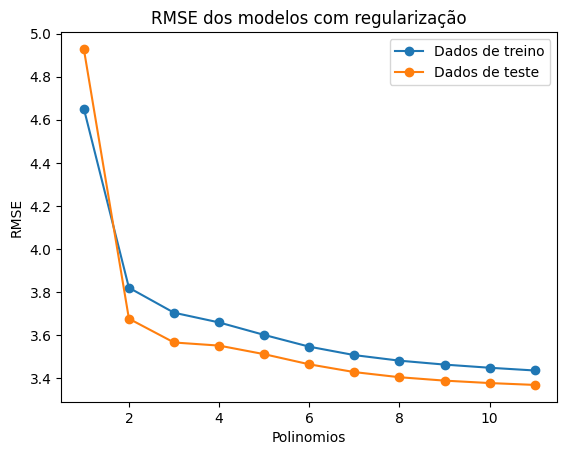

In [60]:
plt.plot(range(1,12),rmse_train_reg,marker='o',label="Dados de treino")
plt.plot(range(1,12),rmse_test_reg,marker='o', label="Dados de teste")
# Rótulos dos eixos e título
plt.xlabel("Polinomios")
plt.ylabel("RMSE")
plt.title("RMSE dos modelos com regularização")
plt.legend()
plt.show()

# Questão 2

In [ ]:
# Formaçao de x e y do train test 
train_x=gauss[['x']]
train_y=gauss[['y']]

In [15]:
# Definição e ajuste do normalizador
norm=Nomalizer()
norm.fit(train_x,train_y)

In [ ]:
# Normalização do train e test
norm_Trx,norm_Try=norm.normalize(train_x,train_y)

Produzindo as estatisticas do polinomio 1
RMSE do treino do polinomio 1: 32.22943238319221


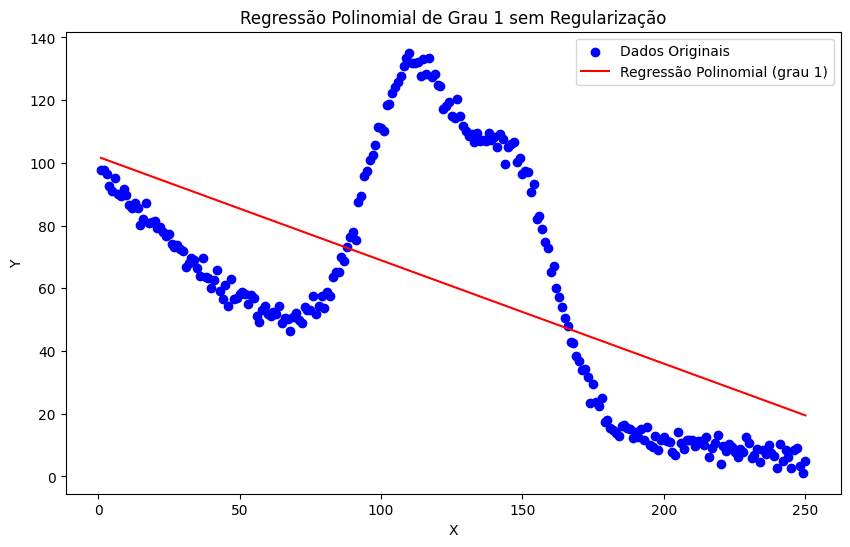

Produzindo as estatisticas do polinomio 2
RMSE do treino do polinomio 2: 26.024259117506638


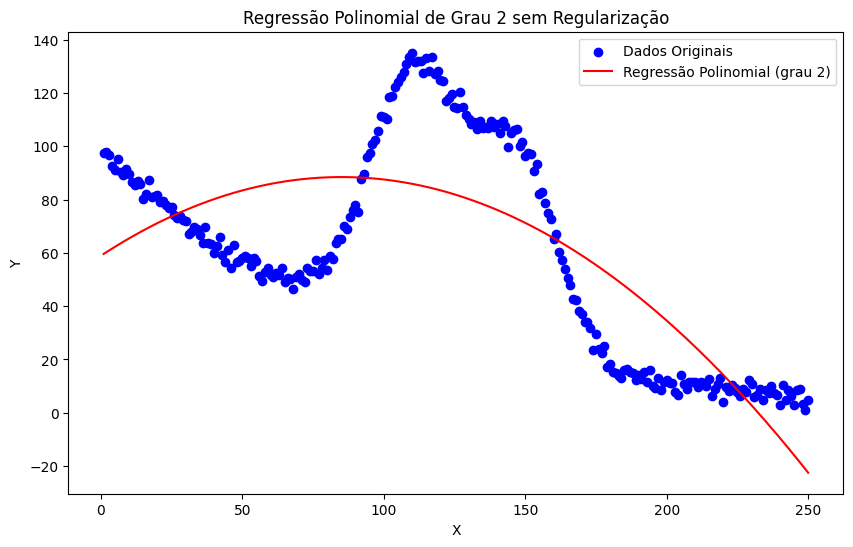

Produzindo as estatisticas do polinomio 3
RMSE do treino do polinomio 3: 25.961895013738832


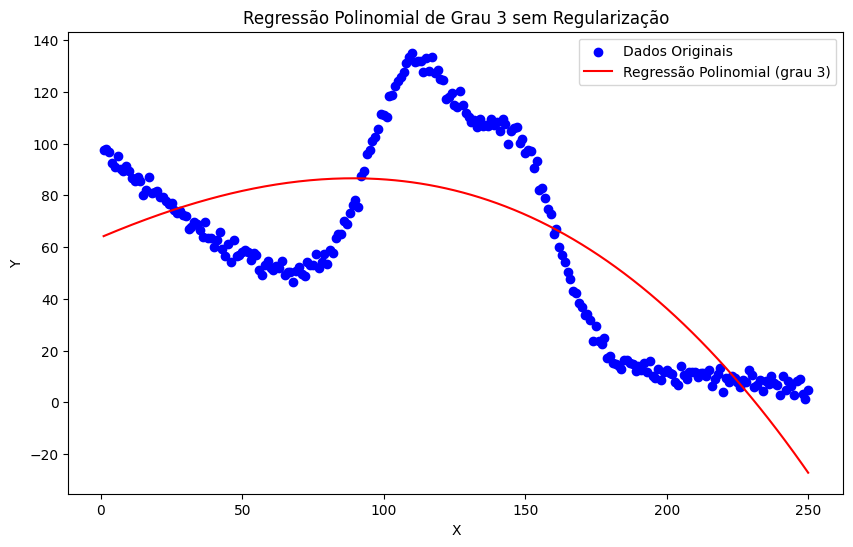

Produzindo as estatisticas do polinomio 4
RMSE do treino do polinomio 4: 15.504432793680161


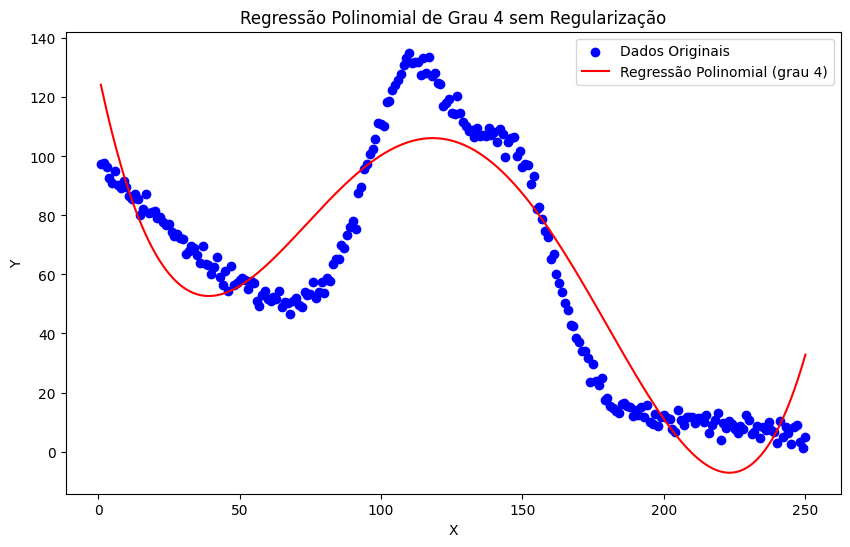

Produzindo as estatisticas do polinomio 5
RMSE do treino do polinomio 5: 15.496742292877908


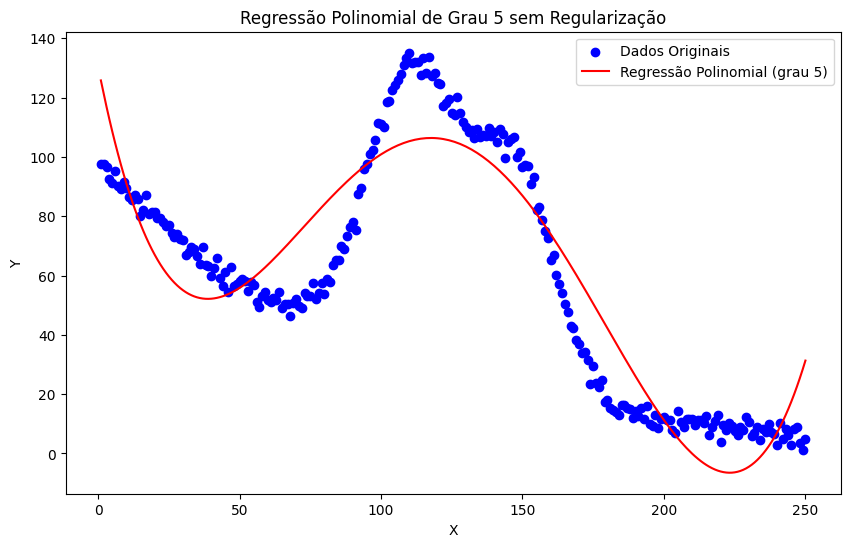

Produzindo as estatisticas do polinomio 6
RMSE do treino do polinomio 6: 8.265503911166512


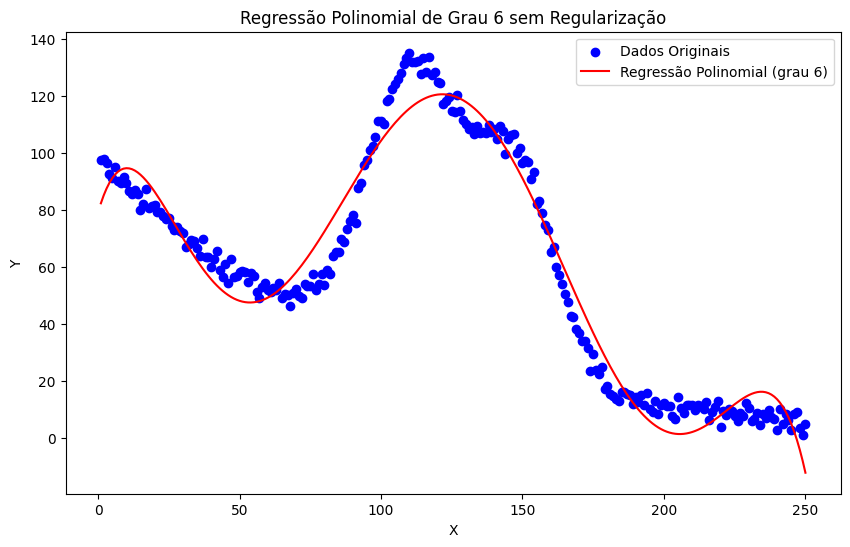

Produzindo as estatisticas do polinomio 7
RMSE do treino do polinomio 7: 8.247856883478889


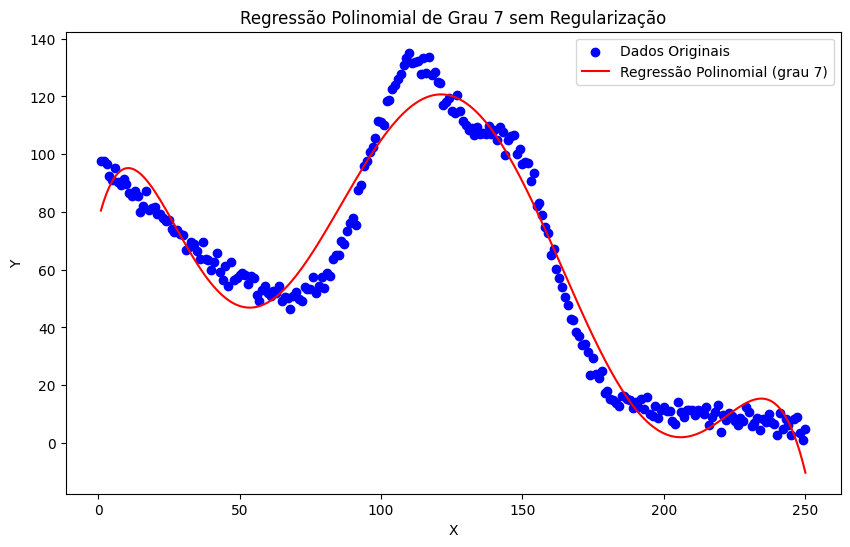

Produzindo as estatisticas do polinomio 8
RMSE do treino do polinomio 8: 5.8308355513905665


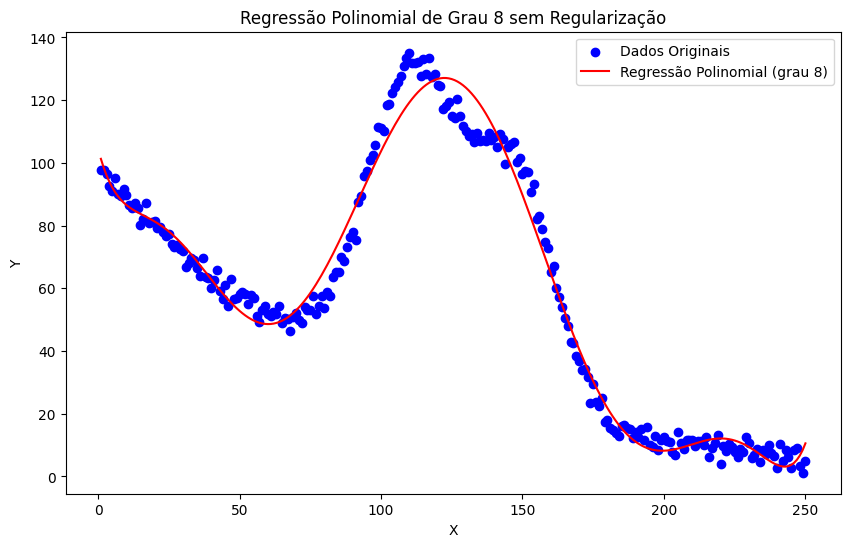

Produzindo as estatisticas do polinomio 9
RMSE do treino do polinomio 9: 5.772007771821451


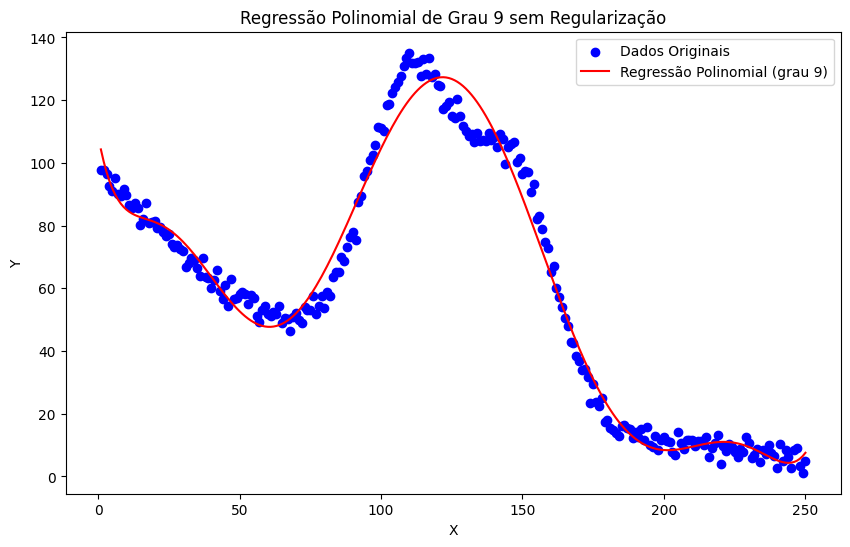

Produzindo as estatisticas do polinomio 10
RMSE do treino do polinomio 10: 5.689854754121198


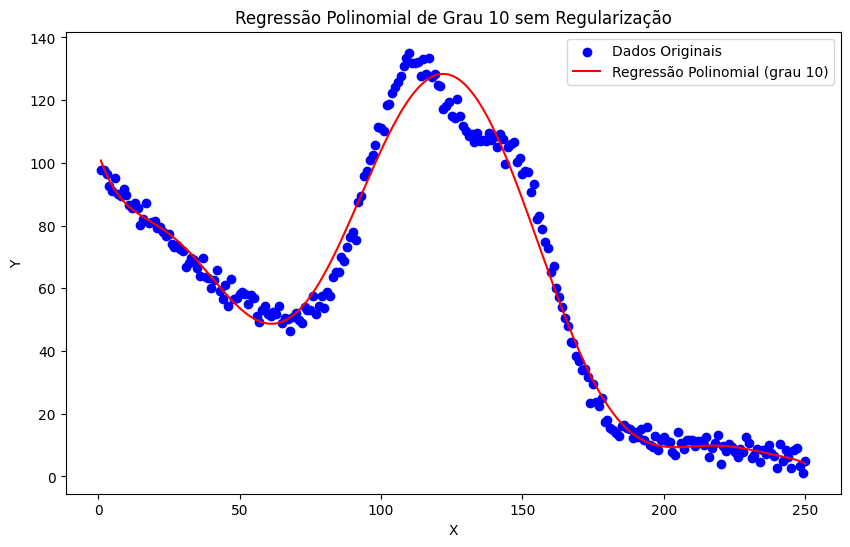

Produzindo as estatisticas do polinomio 11
RMSE do treino do polinomio 11: 5.710285998188486


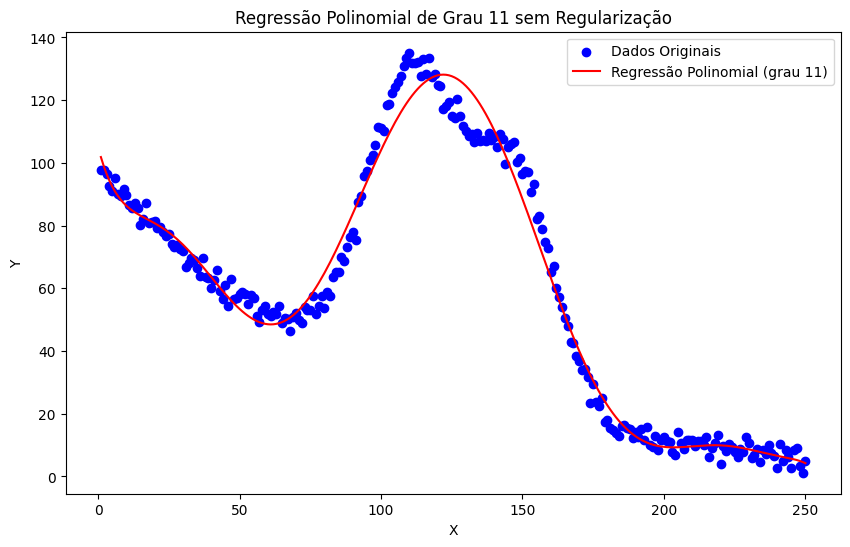

Produzindo as estatisticas do polinomio 12
RMSE do treino do polinomio 12: 5.714775257491913


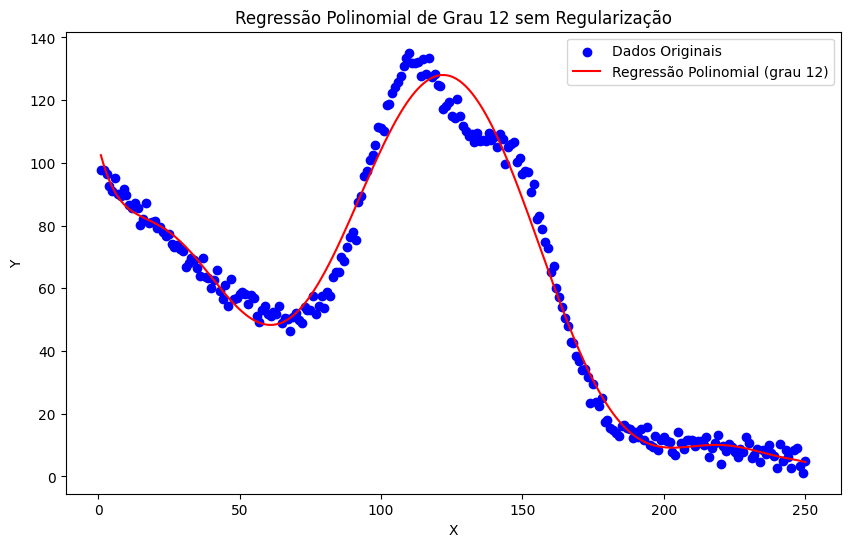

Produzindo as estatisticas do polinomio 13
RMSE do treino do polinomio 13: 5.689435634377723


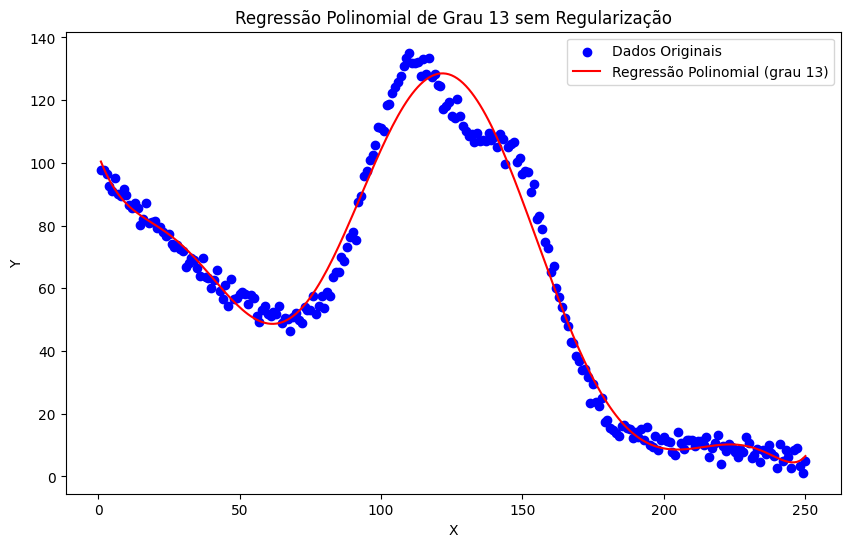

Produzindo as estatisticas do polinomio 14
RMSE do treino do polinomio 14: 5.711167346391653


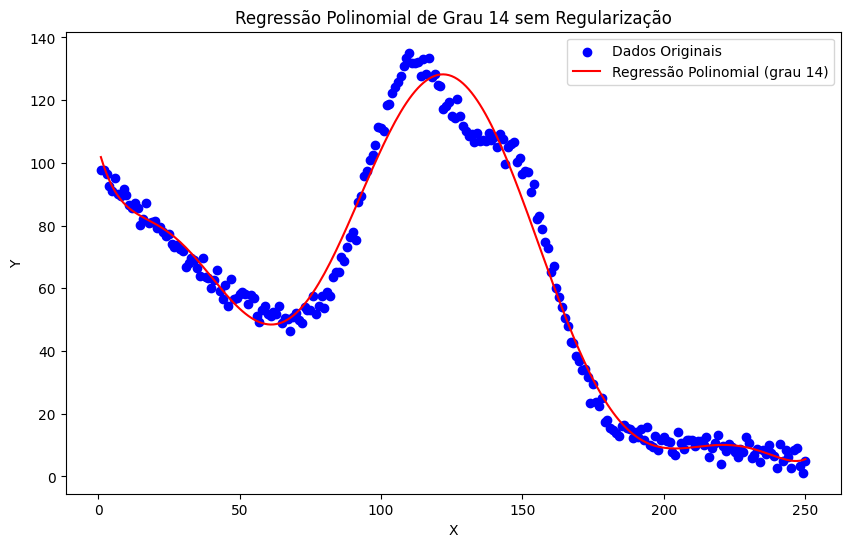

Produzindo as estatisticas do polinomio 15
RMSE do treino do polinomio 15: 5.711987573909991


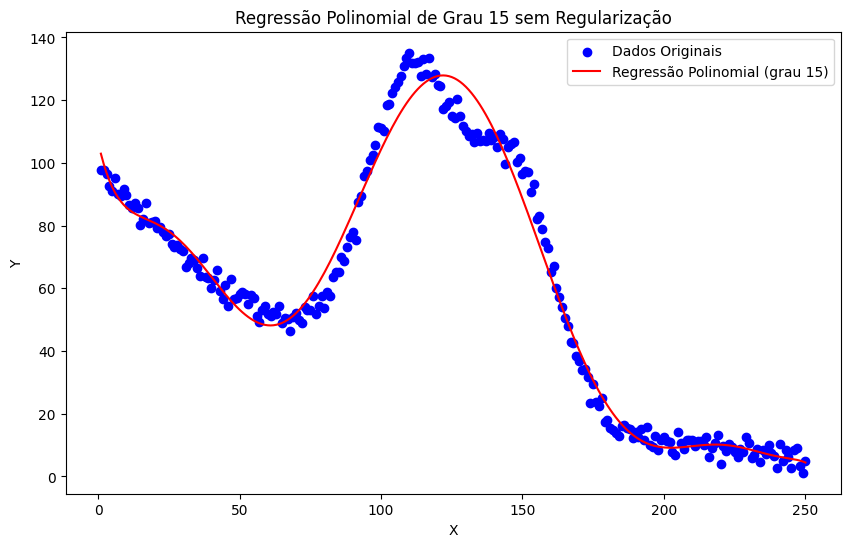

Produzindo as estatisticas do polinomio 16
RMSE do treino do polinomio 16: 5.69695523334511


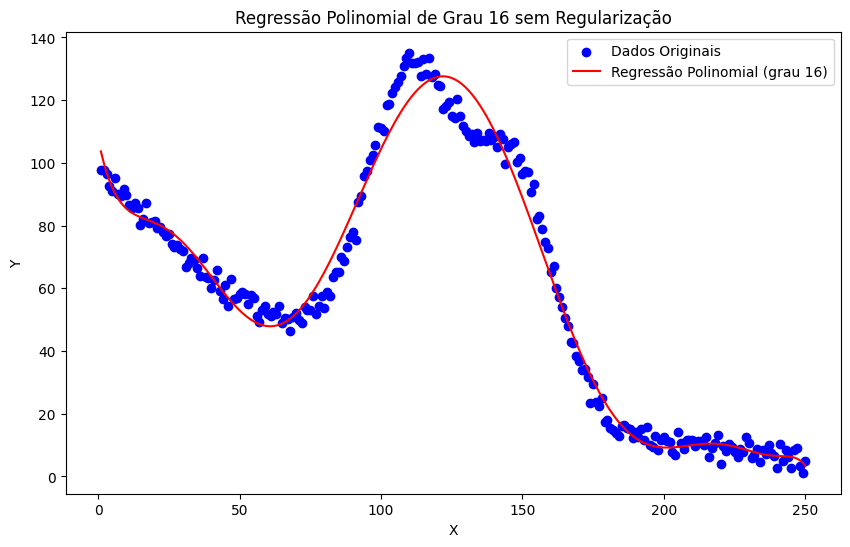

Produzindo as estatisticas do polinomio 17
RMSE do treino do polinomio 17: 5.4033078288046275


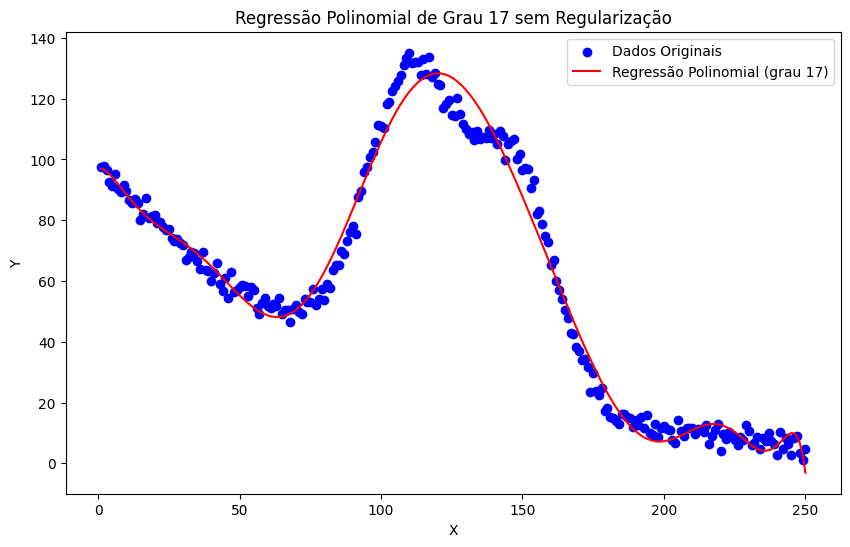

Produzindo as estatisticas do polinomio 18
RMSE do treino do polinomio 18: 5.489998724773317


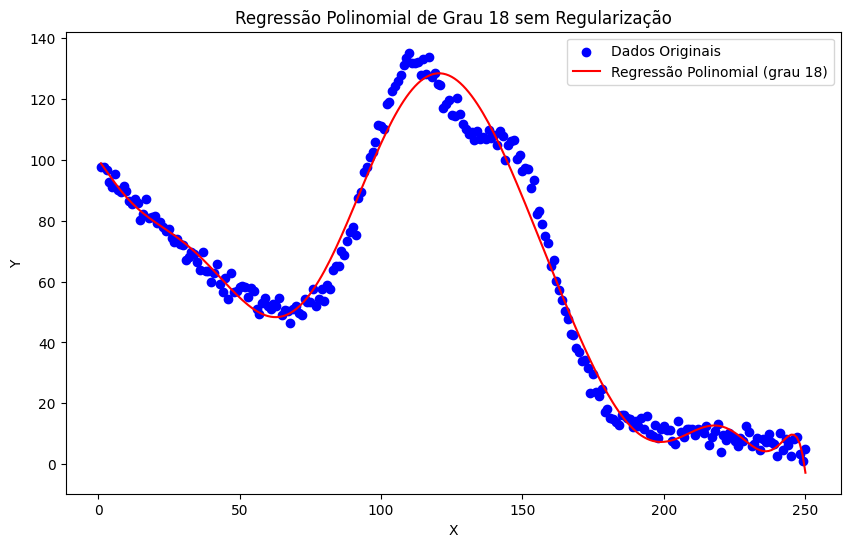

Produzindo as estatisticas do polinomio 19
RMSE do treino do polinomio 19: 5.562445796716045


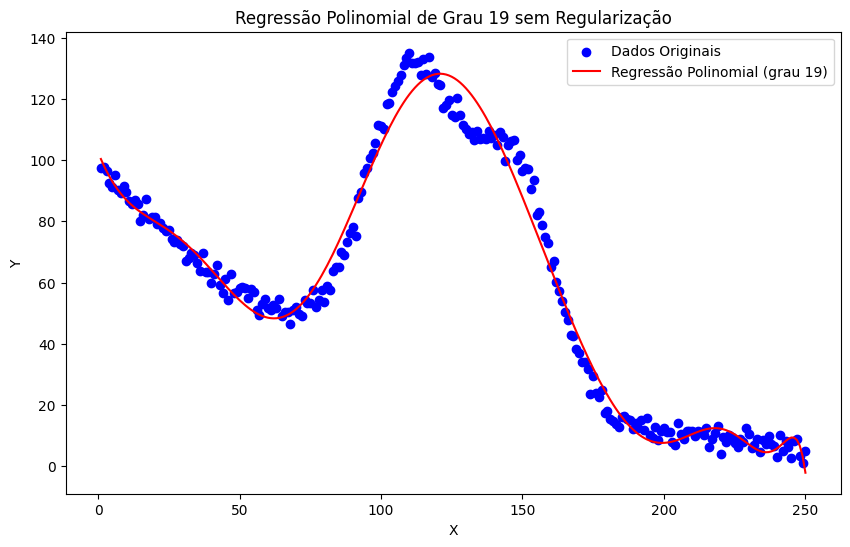

Produzindo as estatisticas do polinomio 20
RMSE do treino do polinomio 20: 5.61248623822152


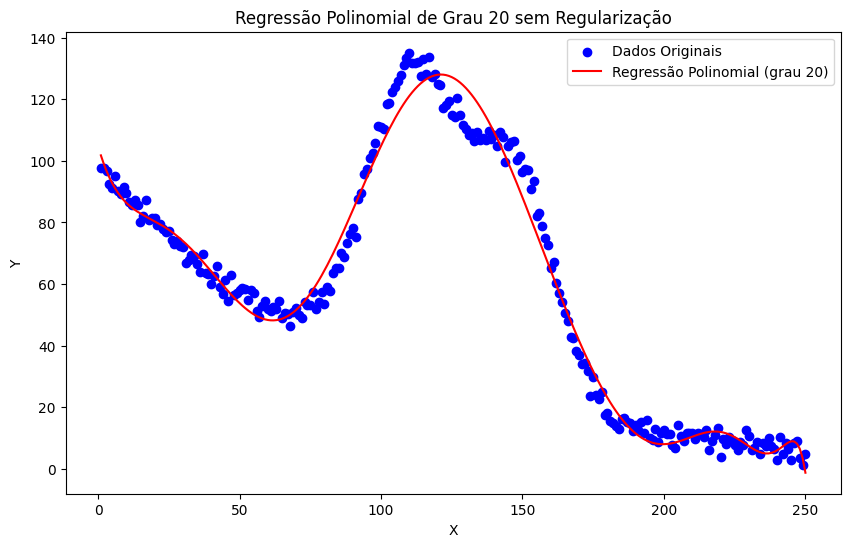

In [27]:
polinomios=20
rmse_train_reg=[]
rmse_test_reg=[]
l=0.0
for n in range(1,polinomios+1):
    print(f"Produzindo as estatisticas do polinomio {n}")

    #Definição do modelo
    poli=PolinomialRegression()# Definição do modelo
    poli.fit(norm_Trx,norm_Try,n,l)# Treino do modelo

    #Teste da predição e o calculo do RMSE para o treino
    ytpred_norm=poli.predict(norm_Trx)# Predição para os dados de treino
    ytpred_norm_df=pd.DataFrame(ytpred_norm)# Transformando para df para desnormalizar
    x_train,yt_pred=norm.desnormalize(norm_Trx,ytpred_norm_df)# Desnormalização da predição de treino
    yt_pred_array = yt_pred.to_numpy().flatten()# Ajuste dos dados para o calaculo  
    train_y_array = train_y.to_numpy().flatten()# Ajuste dos dados para o calculo
    smetr=sum([(train_y_array[i]-yt_pred_array[i])**2 for i in range(len(yt_pred_array))])/len(yt_pred_array)# Calculo do RMSE para os dados de treino
    rsmetr=math.sqrt(smetr)# Calculo da raiz de MSE do treino
    rmse_train_reg.append(rsmetr)# Salvando todos dos RMSEs
    print(f'RMSE do treino do polinomio {n}: {rsmetr}')

     # Gráfico de dispersão e curva de regressão
    plt.figure(figsize=(10, 6))
    plt.scatter(train_x, train_y_array, color="blue", label="Dados Originais")
    plt.plot(train_x, yt_pred_array, color="red", label=f"Regressão Polinomial (grau {n})")
    plt.title(f"Regressão Polinomial de Grau {n} sem Regularização")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.show()
  

    

In [72]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

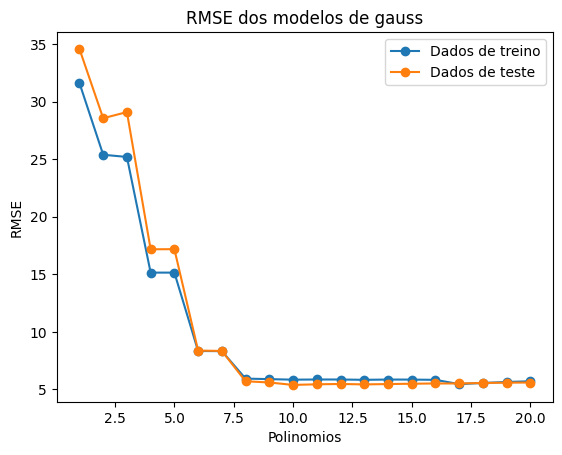

In [89]:
plt.plot(range(1,21),rmse_train_reg,marker='o',label="Dados de treino")
plt.plot(range(1,21),rmse_test_reg,marker='o', label="Dados de teste")
# Rótulos dos eixos e título
plt.xlabel("Polinomios")
plt.ylabel("RMSE")
plt.title("RMSE dos modelos de gauss")
plt.legend()
plt.show()

RMSE do treino do polinomio 1: 32.22943780154722


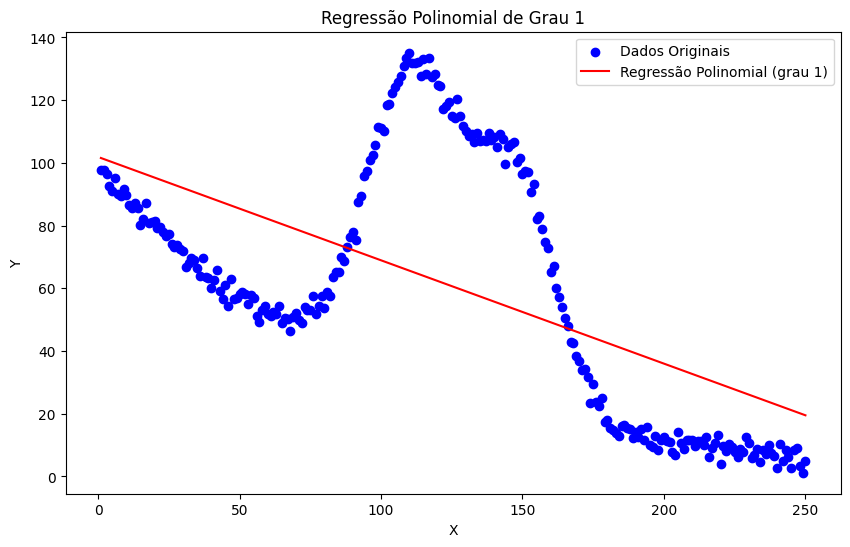

RMSE do treino do polinomio 2: 26.025174286263795


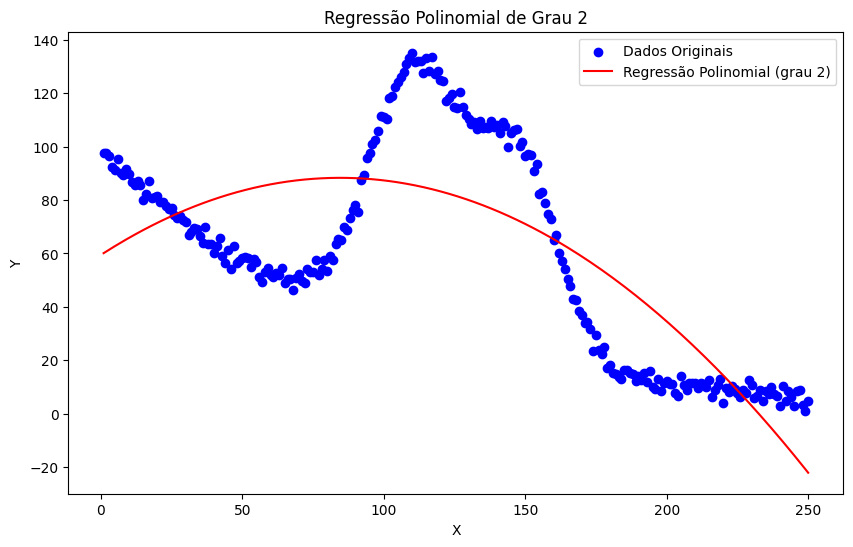

RMSE do treino do polinomio 3: 25.962898801081593


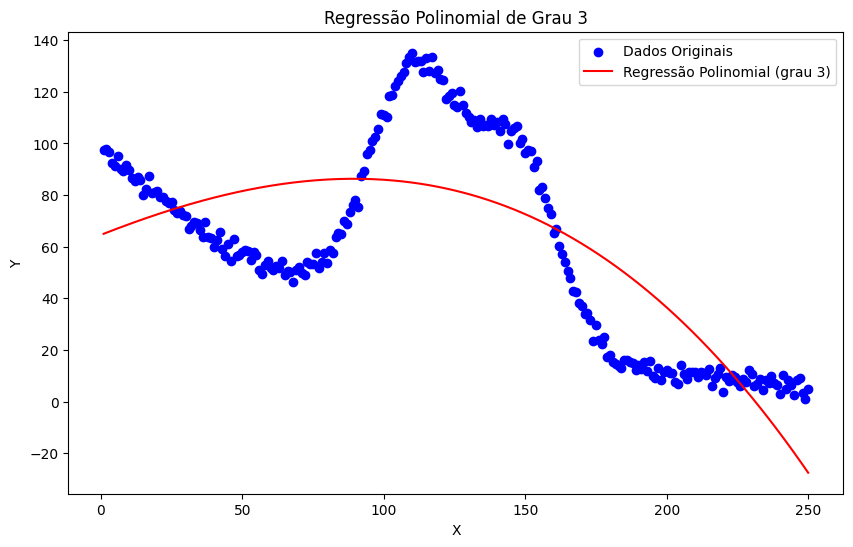

RMSE do treino do polinomio 4: 24.50742491891864


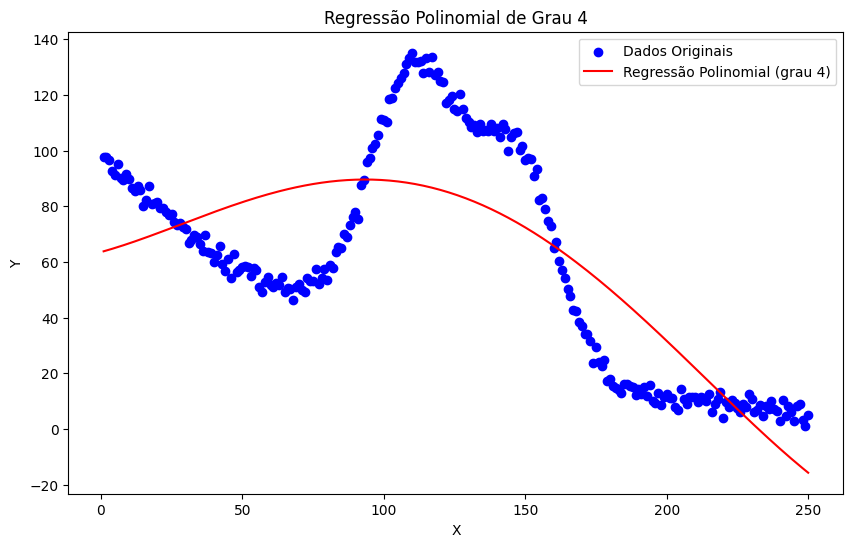

RMSE do treino do polinomio 5: 21.715295342864156


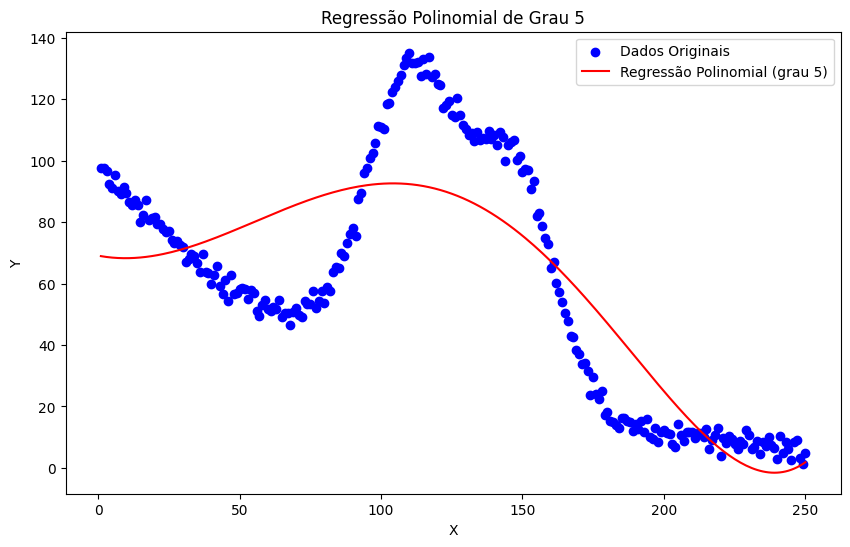

RMSE do treino do polinomio 6: 19.81091537199083


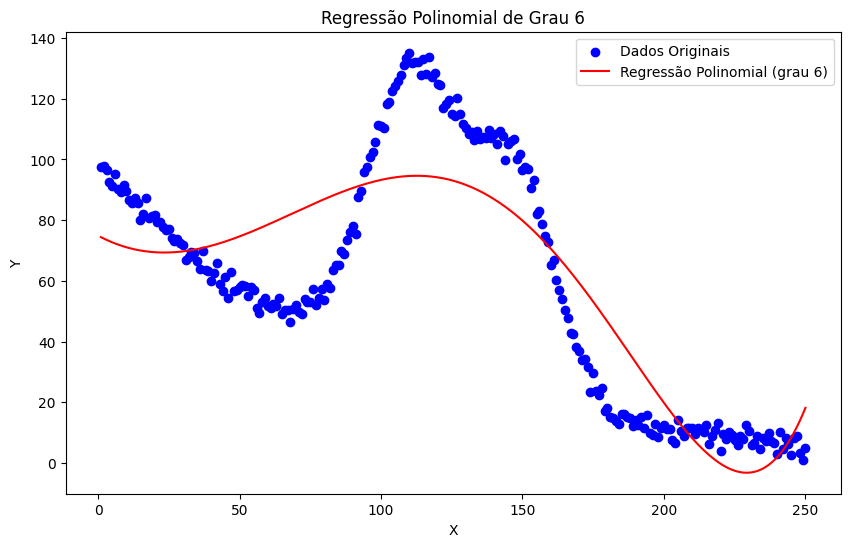

RMSE do treino do polinomio 7: 19.35407011363349


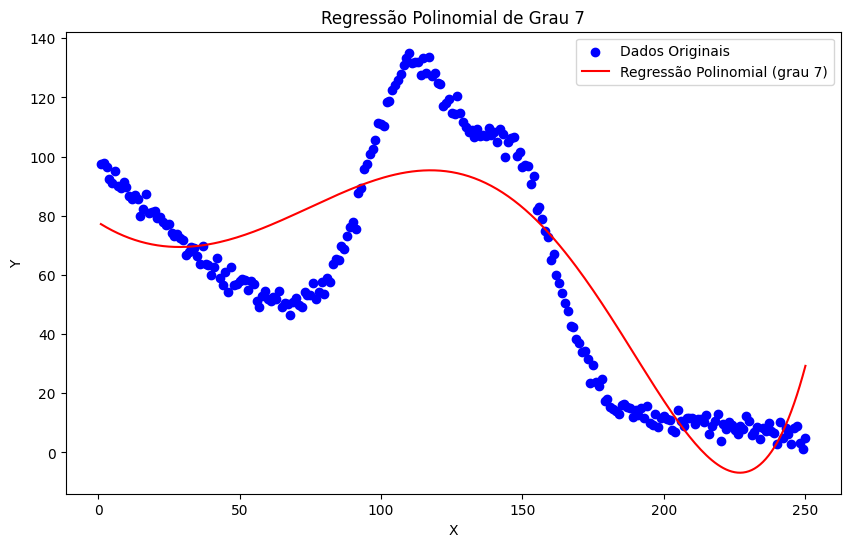

RMSE do treino do polinomio 8: 19.492020251421845


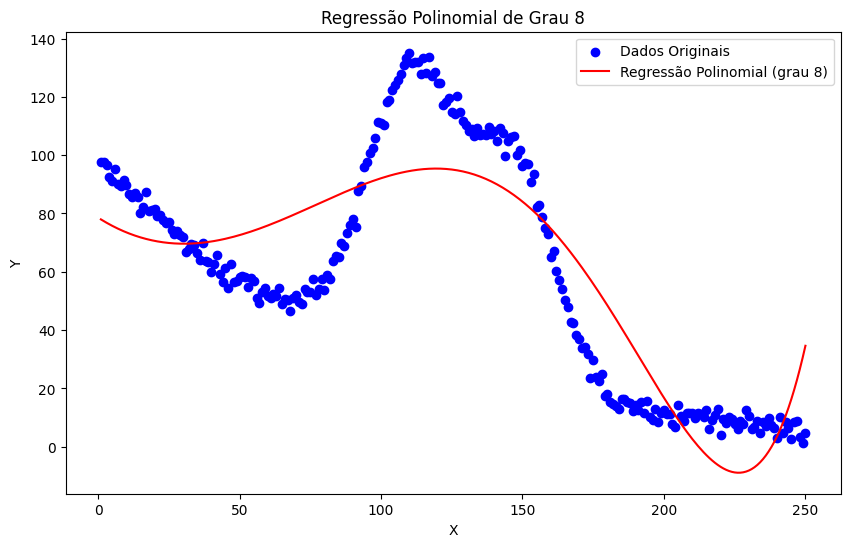

RMSE do treino do polinomio 9: 19.539609743749562


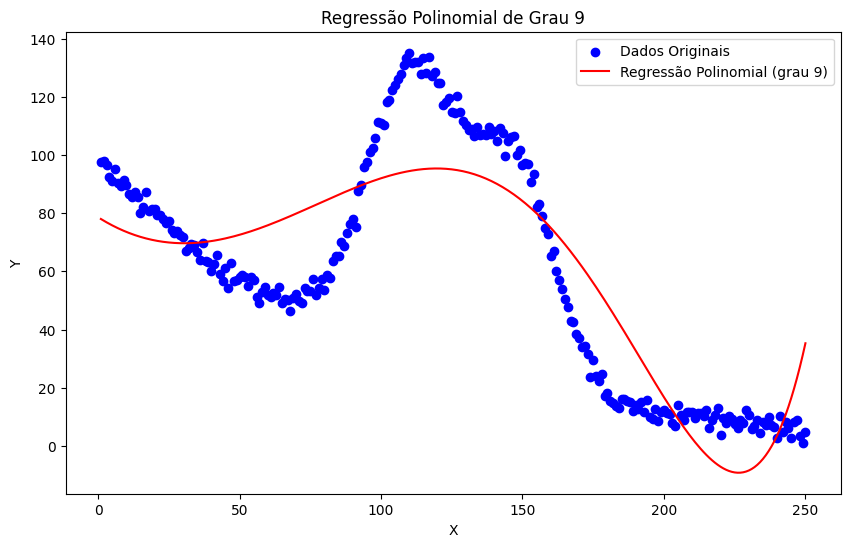

RMSE do treino do polinomio 10: 19.282237246349116


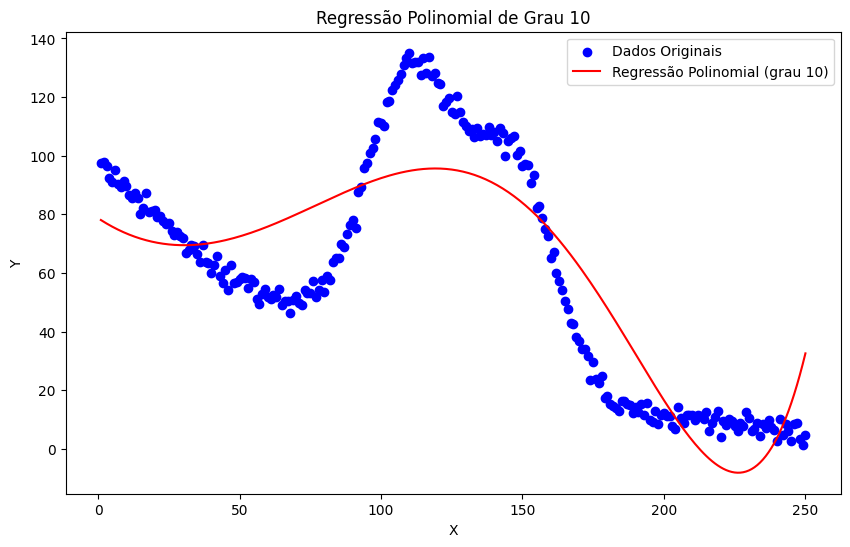

RMSE do treino do polinomio 11: 18.767558042790125


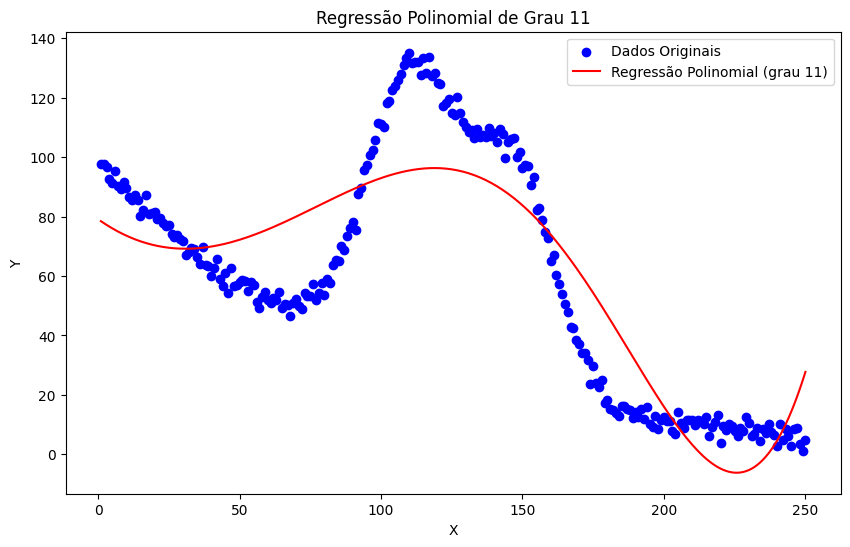

RMSE do treino do polinomio 12: 18.134977877708472


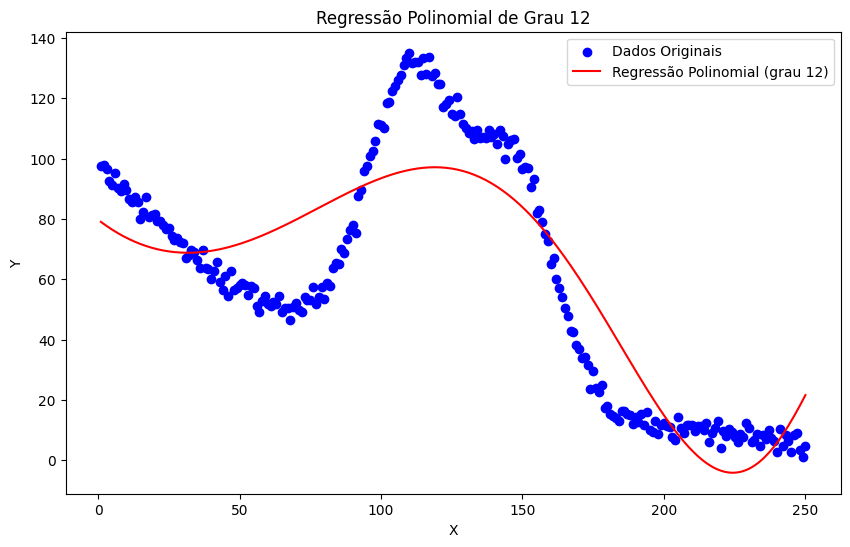

RMSE do treino do polinomio 13: 17.523143600740816


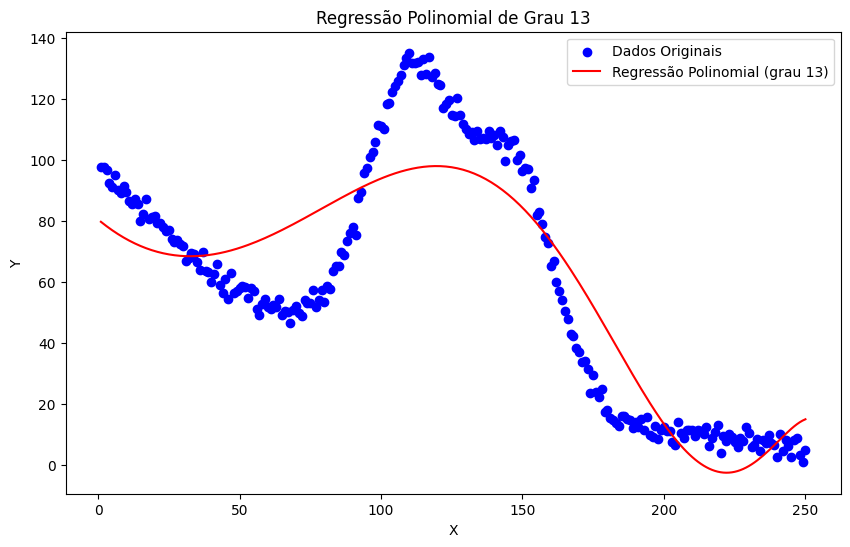

RMSE do treino do polinomio 14: 17.0268576084651


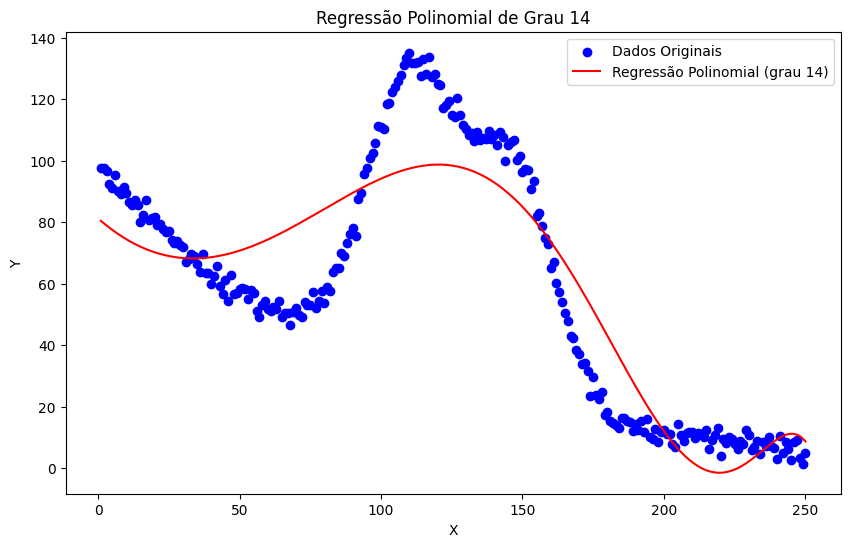

RMSE do treino do polinomio 15: 16.68616757093202


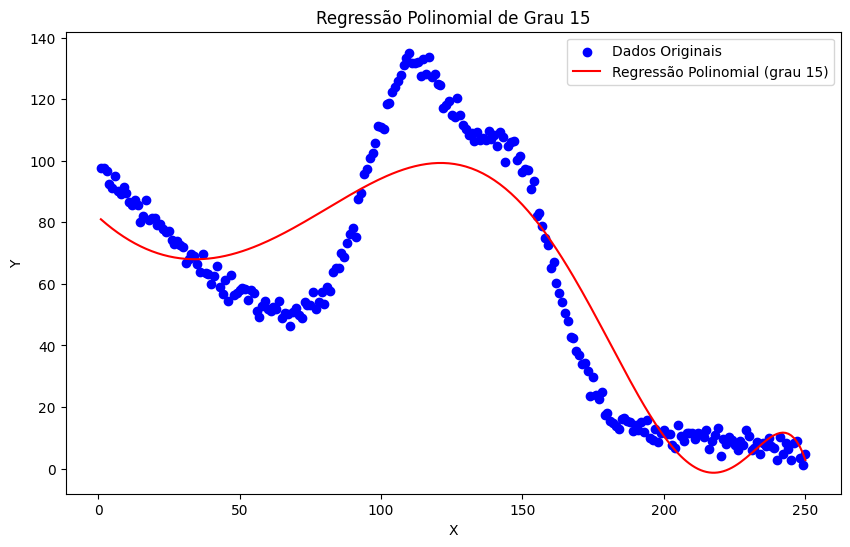

RMSE do treino do polinomio 16: 16.495773973845093


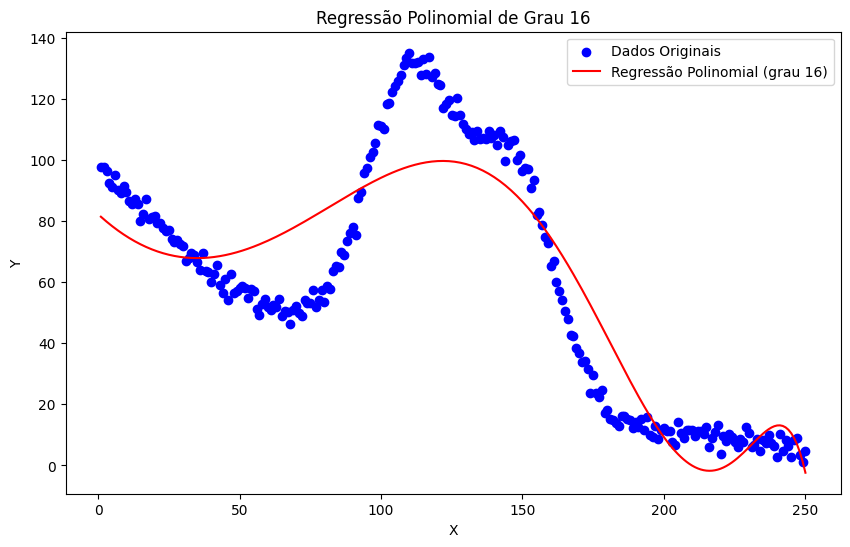

RMSE do treino do polinomio 17: 16.42343082514098


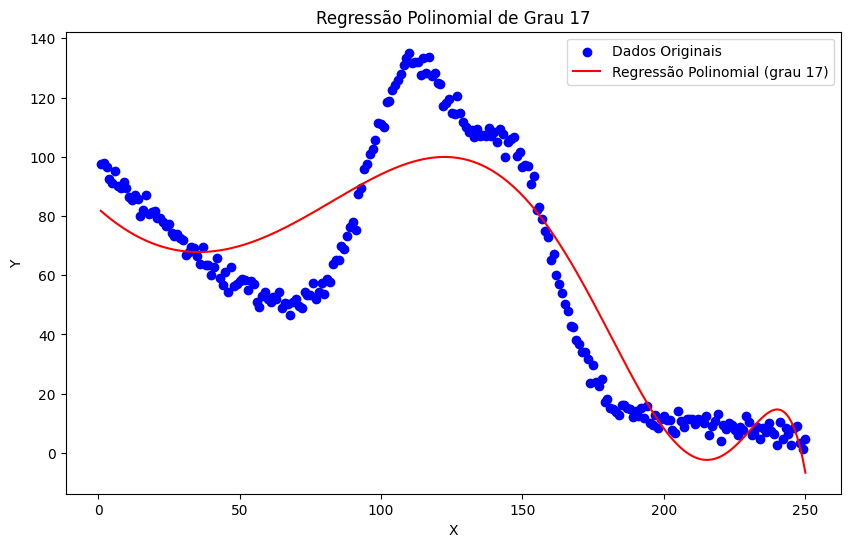

RMSE do treino do polinomio 18: 16.42777847004509


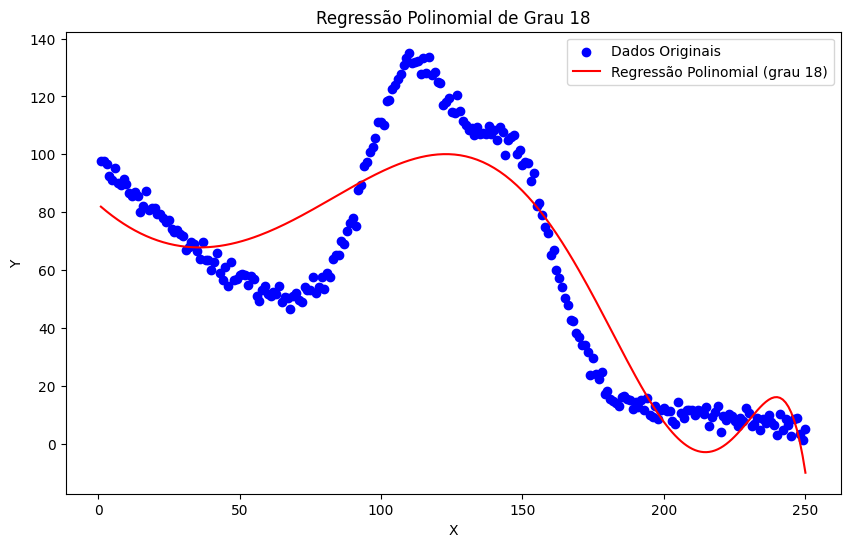

RMSE do treino do polinomio 19: 16.470450405380735


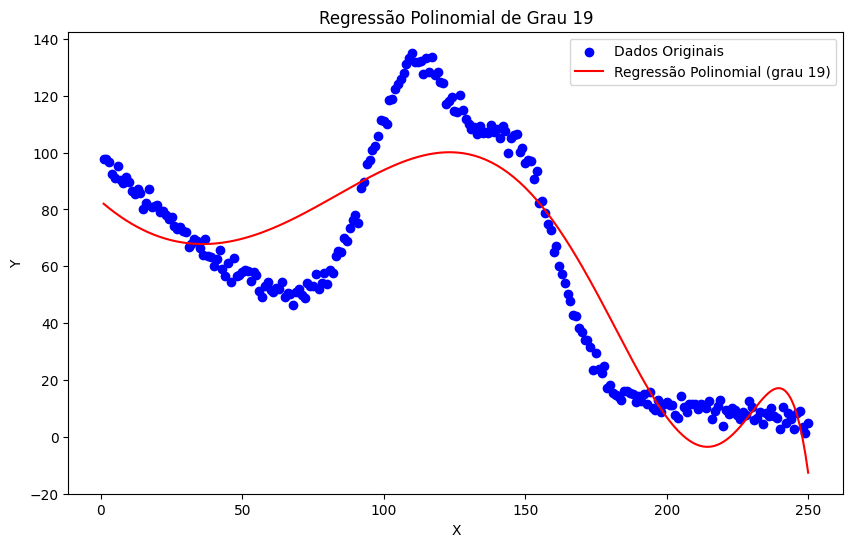

RMSE do treino do polinomio 20: 16.521838333732166


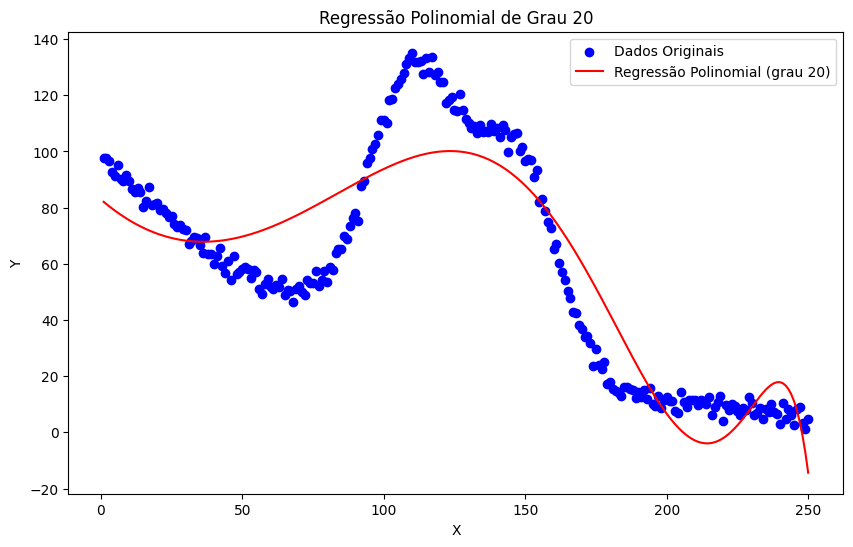

In [25]:
polinomios=20
rmse_train_reg=[]
rmse_test_reg=[]
l=0.01
for n in range(1,polinomios+1):
    #print(f"Produzindo as estatisticas do polinomio {n}")

    #Definição do modelo
    poli=PolinomialRegression()# Definição do modelo
    poli.fit(norm_Trx,norm_Try,n,l)# Treino do modelo

    #Teste da predição e o calculo do RMSE para o treino
    ytpred_norm=poli.predict(norm_Trx)# Predição para os dados de treino
    ytpred_norm_df=pd.DataFrame(ytpred_norm)# Transformando para df para desnormalizar
    x_train,yt_pred=norm.desnormalize(norm_Trx,ytpred_norm_df)# Desnormalização da predição de treino
    yt_pred_array = yt_pred.to_numpy().flatten()# Ajuste dos dados para o calaculo  
    train_y_array = train_y.to_numpy().flatten()# Ajuste dos dados para o calculo
    smetr=sum([(train_y_array[i]-yt_pred_array[i])**2 for i in range(len(yt_pred_array))])/len(yt_pred_array)# Calculo do RMSE para os dados de treino
    rsmetr=math.sqrt(smetr)# Calculo da raiz de MSE do treino
    rmse_train_reg.append(rsmetr)# Salvando todos dos RMSEs
    print(f'RMSE do treino do polinomio {n}: {rsmetr}')

    # Gráfico de dispersão e curva de regressão
    plt.figure(figsize=(10, 6))
    plt.scatter(train_x, train_y_array, color="blue", label="Dados Originais")
    plt.plot(train_x, yt_pred_array, color="red", label=f"Regressão Polinomial (grau {n})")
    plt.title(f"Regressão Polinomial de Grau {n}")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.show()


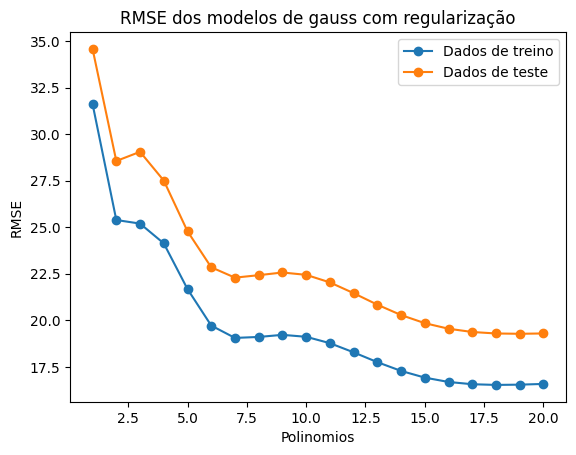

In [111]:
plt.plot(range(1,21),rmse_train_reg,marker='o',label="Dados de treino")
plt.plot(range(1,21),rmse_test_reg,marker='o', label="Dados de teste")
# Rótulos dos eixos e título
plt.xlabel("Polinomios")
plt.ylabel("RMSE")
plt.title("RMSE dos modelos de gauss com regularização")
plt.legend()
plt.show()